In [1]:
import json
import numpy as np
import seaborn as sns
import pandas as pd
from scikit_posthocs import posthoc_wilcoxon

In [2]:
f = open("results_100_with_spaCy_cwe_capec.json")
results = json.load(f)

f = open("results_100_with_spaCy_cwe_capec_with_cve_2021.json")
results_with_cve = json.load(f)

In [3]:
results_fp = results["5"]["A1 + MI"]["fp"]
results_with_cve_fp = results_with_cve["5"]["A1 + MI"]["fp"]

results_acc = results["5"]["A1 + MI"]["acc"]
results_with_cve_acc = results_with_cve["5"]["A1 + MI"]["acc"]

print(np.mean(results_fp))
print(np.mean(results_with_cve_fp))

print(np.mean(results_acc))
print(np.mean(results_with_cve_acc))

0.1600983683097673
0.16505538182493149
0.8332605531295488
0.8241193595342068


In [4]:
results = {"4": results["4"], "5": results["5"], "6": results["6"]}

In [5]:
highest_val = 0
highest_encoding = None
metric = "acc"
for encoding in results:
    for data_combo in results[encoding]:
        mean_metric = np.mean(results[encoding][data_combo][metric])
        if mean_metric > highest_val:
            highest_val = mean_metric
            highest_encoding = (encoding, data_combo)

print(highest_encoding)
print(highest_val)

('5', 'A1 + MI')
0.8332605531295488


Encoding method:  5 , Data combo:  A0
0.816943231441048
Encoding method:  5 , Data combo:  A1
0.8171906841339155
Encoding method:  5 , Data combo:  A1 + MI
0.8332605531295488
Encoding method:  5 , Data combo:  A1 + D
0.8042794759825328
Encoding method:  5 , Data combo:  A1 + MI + D
0.8192285298398836


[Text(0, 0.5, 'Data combo'), Text(0.5, 0, 'Metric')]

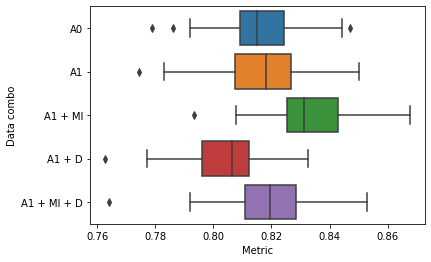

In [6]:
encoding = "5"

data = {}
for data_combo in results[encoding]:
    print("Encoding method: ", encoding, ", Data combo: ", data_combo)
    data[data_combo] = results[encoding][data_combo]["acc"]
    print(np.mean(results[encoding][data_combo]["acc"]))

data = pd.DataFrame(data)

sns.boxplot(data=data, orient="h").set(ylabel="Data combo", xlabel="Metric")

Encoding method:  4 , Data combo:  A1
Encoding method:  5 , Data combo:  A1
Encoding method:  6 , Data combo:  A1


[Text(0, 0.5, 'Encoding'), Text(0.5, 0, 'Metric')]

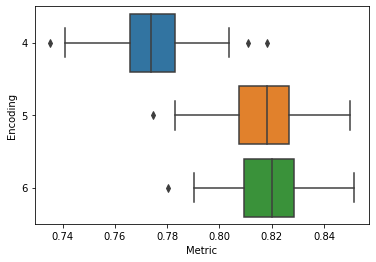

In [7]:
data_combo = "A1"
data = {}
for encoding in results:
    print("Encoding method: ", encoding, ", Data combo: ", data_combo)
    data[encoding] = results[encoding][data_combo]["acc"]

data = pd.DataFrame(data)

sns.boxplot(data=data, orient="h").set(ylabel="Encoding", xlabel="Metric")

In [8]:
data_combo = "A1"
accs = []
encodings = []
for encoding in results:
    if data_combo != "A0" or encoding not in ["2", "5"]:
        print(data_combo)
        print(encoding)
        encodings.append(encoding)
        accs.append(results[encoding][data_combo]["acc"])

rank_sums = posthoc_wilcoxon(accs, p_adjust="bonferroni")
rank_sums.columns = encodings
rank_sums.index = encodings
rank_sums

A1
4
A1
5
A1
6


,4,5,6
4,1.000000e+00,1.156698e-17,1.158331e-17
5,1.156698e-17,1.000000e+00,2.509844e-01
6,1.158331e-17,2.509844e-01,1.000000e+00


In [9]:
encoding = "4"
accs = []
data_combo_list = []
for data_combo in results[encoding]:
    print(data_combo)
    print(encoding)
    data_combo_list.append(data_combo)
    accs.append(results[encoding][data_combo]["acc"])
rank_sums = posthoc_wilcoxon(accs, p_adjust="bonferroni")
rank_sums.columns = data_combo_list
rank_sums.index = data_combo_list
rank_sums

A0
4
A1
4
A1 + MI
4
A1 + D
4
A1 + MI + D
4


,A0,A1,A1 + MI,A1 + D,A1 + MI + D
A0,1.000000e+00,3.879888e-17,3.995154e-17,3.870922e-17,3.997182e-17
A1,3.879888e-17,1.000000e+00,9.891843e-12,1.702811e-16,1.109589e-13
A1 + MI,3.995154e-17,9.891843e-12,1.000000e+00,9.856040e-03,4.024811e-01
A1 + D,3.870922e-17,1.702811e-16,9.856040e-03,1.000000e+00,1.161590e-01
A1 + MI + D,3.997182e-17,1.109589e-13,4.024811e-01,1.161590e-01,1.000000e+00


Encoding method:  4 , Data combo:  A0
Encoding method:  4 , Data combo:  A1
Encoding method:  4 , Data combo:  A1 + MI
Encoding method:  4 , Data combo:  A1 + D
Encoding method:  4 , Data combo:  A1 + MI + D
Encoding method:  5 , Data combo:  A0
Encoding method:  5 , Data combo:  A1
Encoding method:  5 , Data combo:  A1 + MI
Encoding method:  5 , Data combo:  A1 + D
Encoding method:  5 , Data combo:  A1 + MI + D
Encoding method:  6 , Data combo:  A0
Encoding method:  6 , Data combo:  A1
Encoding method:  6 , Data combo:  A1 + MI
Encoding method:  6 , Data combo:  A1 + D
Encoding method:  6 , Data combo:  A1 + MI + D


[Text(0, 0.5, '(Encoding, data combination)'),
 Text(0.5, 0, 'Accuracy'),
 Text(0.5, 1.0, 'spaCy Experiments')]

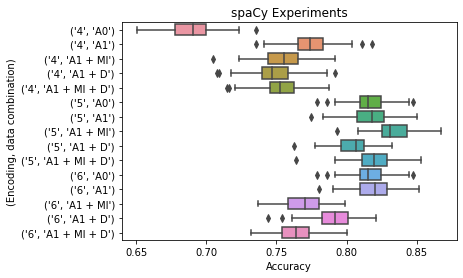

In [10]:
data = {}
for encoding in results:
    for data_combo in results[encoding]:
        print("Encoding method: ", encoding, ", Data combo: ", data_combo)
        data[(encoding, data_combo)] = results[encoding][data_combo]["acc"]

data = pd.DataFrame(data)

sns.boxplot(data=data, orient="h").set(
    ylabel="(Encoding, data combination)", xlabel="Accuracy", title="spaCy Experiments"
)

In [11]:
accs = []
data_combo_list = []
for encoding in results:
    for data_combo in results[encoding]:
        if data_combo != "A0" or encoding not in ["5"]:
            data_combo_list.append((encoding, data_combo))
            accs.append(results[encoding][data_combo]["acc"])
rank_sums = posthoc_wilcoxon(accs, p_adjust="bonferroni")
rank_sums.columns = data_combo_list
rank_sums.index = data_combo_list
rank_sums

,"(4, A0)","(4, A1)","(4, A1 + MI)","(4, A1 + D)","(4, A1 + MI + D)","(5, A1)","(5, A1 + MI)","(5, A1 + D)","(5, A1 + MI + D)","(6, A0)","(6, A1)","(6, A1 + MI)","(6, A1 + D)","(6, A1 + MI + D)"
"(4, A0)",1.000000e+00,3.530698e-16,3.635590e-16,3.522539e-16,3.637436e-16,3.518367e-16,3.521148e-16,3.527512e-16,3.529105e-16,3.518168e-16,3.532491e-16,3.530499e-16,3.525920e-16,3.534086e-16
"(4, A1)",3.530698e-16,1.000000e+00,9.001577e-11,1.549558e-15,1.009726e-12,3.508650e-16,3.513010e-16,1.020430e-15,3.721896e-16,5.307248e-16,3.513605e-16,1.000000e+00,6.439012e-12,3.209500e-06
"(4, A1 + MI)",3.635590e-16,9.001577e-11,1.000000e+00,8.968997e-02,1.000000e+00,3.521148e-16,3.521347e-16,3.504494e-16,3.517573e-16,3.522340e-16,3.519956e-16,1.189461e-10,6.268484e-16,3.902477e-03
"(4, A1 + D)",3.522539e-16,1.549558e-15,8.968997e-02,1.000000e+00,1.000000e+00,3.498564e-16,3.516779e-16,3.503307e-16,3.502516e-16,3.520552e-16,3.526119e-16,3.459473e-14,5.146407e-16,1.385379e-10
"(4, A1 + MI + D)",3.637436e-16,1.009726e-12,1.000000e+00,1.000000e+00,1.000000e+00,3.512018e-16,3.512613e-16,3.519558e-16,3.521545e-16,3.525124e-16,3.521347e-16,6.557884e-14,3.628423e-16,3.258894e-06
"(5, A1)",3.518367e-16,3.508650e-16,3.521148e-16,3.498564e-16,3.512018e-16,1.000000e+00,5.524894e-15,1.770904e-12,1.000000e+00,1.000000e+00,1.000000e+00,3.514596e-16,7.339210e-16,3.623924e-16
"(5, A1 + MI)",3.521148e-16,3.513010e-16,3.521347e-16,3.516779e-16,3.512613e-16,5.524894e-15,1.000000e+00,5.365085e-16,1.292615e-13,7.104562e-14,1.191713e-12,3.521347e-16,3.513010e-16,3.519360e-16
"(5, A1 + D)",3.527512e-16,1.020430e-15,3.504494e-16,3.503307e-16,3.519558e-16,1.770904e-12,5.365085e-16,1.000000e+00,5.728259e-14,8.553210e-11,8.040968e-14,5.297486e-16,3.250035e-14,3.592176e-16
"(5, A1 + MI + D)",3.529105e-16,3.721896e-16,3.517573e-16,3.502516e-16,3.521545e-16,1.000000e+00,1.292615e-13,5.728259e-14,1.000000e+00,1.000000e+00,1.000000e+00,3.520949e-16,3.494419e-16,3.505681e-16
"(6, A0)",3.518168e-16,5.307248e-16,3.522340e-16,3.520552e-16,3.525124e-16,1.000000e+00,7.104562e-14,8.553210e-11,1.000000e+00,1.000000e+00,1.000000e+00,3.519161e-16,9.594113e-16,3.616166e-16
